# **Installing Qiskit**

To use this library developed by IBM firstly we have to install using pip:


```!pip install qiskit```

Then import the package as Quantum Physisc Kit

In [1]:
import qiskit as qpk

%config InlineBackend.figure_format = 'svg'

# **Quantum Circuits**

In quantum information theory, a quantum circuit is a model for quantum computation in which a computation is a sequence of quantum gates, which are reversible transformations on a quantum mechanical analog of an n-bit register.

Let's create an empty one!

In [2]:
cirq = qpk.QuantumCircuit()

# The line below is for paint the circuit
cirq.draw()

A quantum circuit requires qubits and _what is a qubit?_

In quantum computing, a qubit or quantum bit (sometimes qbit) is the basic unit of quantum information—the quantum version of the classical binary bit physically realized with a two-state device. A qubit is a two-state (or two-level) quantum-mechanical system, one of the simplest quantum systems displaying the peculiarity of quantum mechanics. 

Let's create two of them!

In [3]:
qbs = qpk.QuantumRegister(2)
print(f'Total number of bits: {len(qbs)} \n')

# Once we have create the qbits we need to add to one circuit like above
cirq.add_register(qbs)

# We always can see the registers that our circuit has
print(cirq.qregs)

cirq.draw()

Total number of bits: 2 

[QuantumRegister(2, 'q0')]


q0_0: |0>
         
q0_1: |0>

As we can see on the previous circuit we have create two qubits in its ground state

## Adding Gates

There are many quantum gates that you can add to a quantum circuit but in this notebook we are going to explore how to add gates, in other notebooks we will study the different gates.

Let's add an Hadamark gate to our circuit, to do this we need to specify also the qbit were we want to apply the gate just like we can see below.

In [4]:
cirq.h(qbs[0]); # the semicolon if to avoid the print message

In order to have a more complex circuit lets add a CNOT gate, where the first qbit is the controler and the second one is the destination.

In [5]:
cirq.cx(qbs[0], qbs[1]);

In [6]:
cirq.draw()

┌───┐     
q0_0: |0>┤ H ├──■──
         └───┘┌─┴─┐
q0_1: |0>─────┤ X ├
              └───┘

### Statevector Simulator

We can see an output of our cirquit, for that we are going to use a simulator of Aer, which is like a subpackage of Qiskit. In other notebooks we will explore how to launch a cirquit on the quatum computer of IBM.

In [7]:
from qiskit import Aer

In [8]:
v_sim = Aer.get_backend('statevector_simulator')

In [9]:
v_sim

<StatevectorSimulator('statevector_simulator') from AerProvider()>

In [10]:
print(f'Here a list of different types of backends for Aer: {Aer.backends()}')

Here a list of different types of backends for Aer: [<QasmSimulator('qasm_simulator') from AerProvider()>, <StatevectorSimulator('statevector_simulator') from AerProvider()>, <UnitarySimulator('unitary_simulator') from AerProvider()>, <PulseSimulator('pulse_simulator') from AerProvider()>]


Let's execute our quantum circuit

In [11]:
res = qpk.execute(cirq, v_sim)
res

And finally let's see the statevector

In [12]:
ket = res.result()
ket

Result(backend_name='statevector_simulator', backend_version='0.4.1', date=datetime.datetime(2020, 3, 18, 19, 11, 17, 573209), header=Obj(backend_name='statevector_simulator', backend_version='0.4.1'), job_id='ee2bddd5-de89-467d-8c31-694e899ff86c', metadata={'max_memory_mb': 7904, 'omp_enabled': True, 'parallel_experiments': 1, 'time_taken': 0.0006051580000000001}, qobj_id='9aadcd4b-ef33-4be9-b852-dc1c1c07dd65', results=[ExperimentResult(data=ExperimentResultData(statevector=array([0.70710678+0.j, 0.        +0.j, 0.        +0.j, 0.70710678+0.j])), header=Obj(clbit_labels=[], creg_sizes=[], memory_slots=0, n_qubits=2, name='circuit0', qreg_sizes=[['q0', 2]], qubit_labels=[['q0', 0], ['q0', 1]]), meas_level=<MeasLevel.CLASSIFIED: 2>, metadata={'parallel_shots': 1, 'parallel_state_update': 4}, seed_simulator=1108295701, shots=1, status='DONE', success=True, time_taken=0.00014285600000000002)], status='COMPLETED', success=True, time_taken=0.015694618225097656)

In [13]:
bell_state = ket.get_statevector()
bell_state

array([0.70710678+0.j, 0.        +0.j, 0.        +0.j, 0.70710678+0.j])

Which correspond with the Bell State:

$$ {{1}\over{\sqrt 2}} (\left| 00 \right\rangle + \left| 11 \right\rangle) = {{1}\over{\sqrt 2}} \begin{bmatrix} 1 \\ 0 \\ 0 \\ 1 \end{bmatrix}$$

One thing that Qiskit provide to us is the possibility to initialize a quantum circuit with a given state. Just like below:

In [14]:
n_cirq = qpk.QuantumCircuit(qbs)

n_cirq.initialize(bell_state, qbs);

In [15]:
n_cirq.draw()

┌──────────────────────────────────┐
q0_0: |0>┤0                                 ├
         │  Initialize(0.70711,0,0,0.70711) │
q0_1: |0>┤1                                 ├
         └──────────────────────────────────┘

### Measures

For a real quantum computer we need to measure to system and for that Qiskit has the ```ClassicalRegister```

In [16]:
cr = qpk.ClassicalRegister(1, 'classical')
cirq.add_register(cr);

Now we can use the measurement specifying the qubit where measure and where the result is written

In [17]:
cirq.measure(qbs[0], cr[0])
cirq.draw()

┌───┐     ┌─┐
      q0_0: |0>┤ H ├──■──┤M├
               └───┘┌─┴─┐└╥┘
      q0_1: |0>─────┤ X ├─╫─
                    └───┘ ║ 
classical_0: 0 ═══════════╩═

Let's to measure the circuit like a quantum computer

In [18]:
emulator = Aer.get_backend('qasm_simulator')
job = qpk.execute(cirq, emulator, shots=10000) # shots is only number of iterations
hist = job.result().get_counts()
hist

{'0': 4953, '1': 5047}

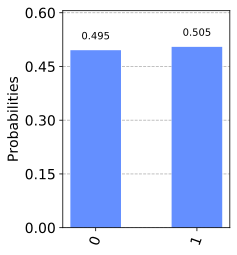

In [19]:
from qiskit.visualization import plot_histogram

plot_histogram(hist, figsize=(3, 4))

Another example

In [20]:
e_cirq = qpk.QuantumCircuit()
e_qb = qpk.QuantumRegister(2, 'qbit')
e_cirq.add_register(e_qb)

e_cirq.h(e_qb[1])
e_cirq.cx(e_qb[1], e_qb[0])

e_cr = qpk.ClassicalRegister(2, 'class')
e_cirq.add_register(e_cr)

e_cirq.measure(e_qb[0], e_cr[0])
e_cirq.measure(e_qb[1], e_cr[1])

e_cirq.draw()

┌───┐┌─┐   
qbit_0: |0>─────┤ X ├┤M├───
           ┌───┐└─┬─┘└╥┘┌─┐
qbit_1: |0>┤ H ├──■───╫─┤M├
           └───┘      ║ └╥┘
class_0: 0 ═══════════╩══╬═
                         ║ 
class_1: 0 ══════════════╩═

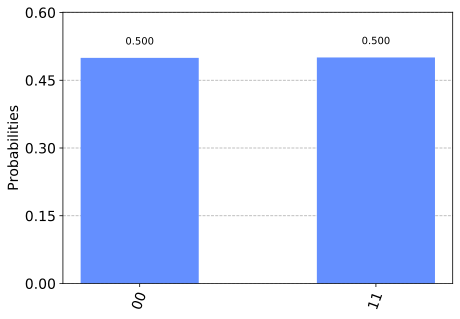

In [21]:
e_job = qpk.execute(e_cirq, emulator, shots=10000)
e_hist = e_job.result().get_counts()
plot_histogram(e_hist)

We also can get the samples of the measurement

In [22]:
job = qpk.execute( e_cirq, emulator, shots=10, memory=True )
samples = job.result().get_memory()
samples

['00', '11', '11', '11', '11', '11', '00', '00', '11', '00']

The bits are labelled from right to left. Let's see this behaviour on the example below

In [23]:
qubit = qpk.QuantumRegister(8)
bit = qpk.ClassicalRegister(8)
circuit = qpk.QuantumCircuit(qubit,bit) # simple notation to create n qbits with m classical reg

circuit.x(qubit[7])
circuit.measure(qubit,bit) # this is a way to do all the qc.measure(qr8[j],cr8[j]) at once
circuit.draw()

┌─┐                     
q1_0: |0>─────┤M├─────────────────────
              └╥┘┌─┐                  
q1_1: |0>──────╫─┤M├──────────────────
               ║ └╥┘┌─┐               
q1_2: |0>──────╫──╫─┤M├───────────────
               ║  ║ └╥┘┌─┐            
q1_3: |0>──────╫──╫──╫─┤M├────────────
               ║  ║  ║ └╥┘┌─┐         
q1_4: |0>──────╫──╫──╫──╫─┤M├─────────
               ║  ║  ║  ║ └╥┘┌─┐      
q1_5: |0>──────╫──╫──╫──╫──╫─┤M├──────
               ║  ║  ║  ║  ║ └╥┘┌─┐   
q1_6: |0>──────╫──╫──╫──╫──╫──╫─┤M├───
         ┌───┐ ║  ║  ║  ║  ║  ║ └╥┘┌─┐
q1_7: |0>┤ X ├─╫──╫──╫──╫──╫──╫──╫─┤M├
         └───┘ ║  ║  ║  ║  ║  ║  ║ └╥┘
 c0_0: 0 ══════╩══╬══╬══╬══╬══╬══╬══╬═
                  ║  ║  ║  ║  ║  ║  ║ 
 c0_1: 0 ═════════╩══╬══╬══╬══╬══╬══╬═
                     ║  ║  ║  ║  ║  ║ 
 c0_2: 0 ════════════╩══╬══╬══╬══╬══╬═
                        ║  ║  ║  ║  ║ 
 c0_3: 0 ═══════════════╩══╬══╬══╬══╬═
                           ║  ║  ║  ║ 
 c0_4: 0 ══════════════════╩══╬══╬══╬═
                              ║  ║  ║ 
 c0_5: 0 ═════════════════════╩══╬══╬═
                                 ║  ║ 
 c0_6: 0 ════════════════════════╩══╬═
                                    ║ 
 c0_7: 0 ═══════════════════════════╩═

In [24]:
qpk.execute(circuit, emulator, shots=100).result().get_counts()

{'10000000': 100}

The bit 1 is on the left.

# **Real Quantum Hardware**

In [25]:
from qiskit import IBMQ
import config as c

First of all we need to register in IBM Quantum Experience in order to get a key. Once you have do the following.

In [26]:
IBMQ.save_account(c.KEY)

Credentials already present. Set overwrite=True to overwrite.


In [27]:
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [28]:
quantum_computers = IBMQ.get_provider(hub='ibm-q')
quantum_computers.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_vigo') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_ourense') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_london') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_burlington') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_essex') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>]

As we can see, we could launch quantum processess on these machines. Simple!

Let's see the status of the Q machines

In [29]:
for qc in quantum_computers.backends():
    print(qc.status())

BackendStatus(backend_name='ibmq_qasm_simulator', backend_version='0.1.547', operational=True, pending_jobs=1, status_msg='active')
BackendStatus(backend_name='ibmqx2', backend_version='2.0.5', operational=True, pending_jobs=0, status_msg='active')
BackendStatus(backend_name='ibmq_16_melbourne', backend_version='2.0.6', operational=True, pending_jobs=3, status_msg='active')
BackendStatus(backend_name='ibmq_vigo', backend_version='1.0.2', operational=True, pending_jobs=9, status_msg='active')
BackendStatus(backend_name='ibmq_ourense', backend_version='1.0.1', operational=True, pending_jobs=6, status_msg='active')
BackendStatus(backend_name='ibmq_london', backend_version='1.1.0', operational=True, pending_jobs=0, status_msg='active')
BackendStatus(backend_name='ibmq_burlington', backend_version='1.1.4', operational=True, pending_jobs=0, status_msg='active')
BackendStatus(backend_name='ibmq_essex', backend_version='1.0.1', operational=True, pending_jobs=8, status_msg='active')
BackendStat

To connect with one just choose by name

In [30]:
real_machine = quantum_computers.get_backend('ibmq_burlington')

Let's make an example of a Noise model (later we will discuss these models)

In [31]:
properties = real_machine.properties()
coupling_map = real_machine.configuration().coupling_map

In [32]:
from qiskit.providers.aer.noise import NoiseModel

noise_model = NoiseModel.from_backend(properties)

In [33]:
qc = qpk.QuantumCircuit(2,2)
qc.x(1)
qc.measure(0,0)
qc.measure(1,1)
qc.draw()

┌─┐   
q_0: |0>─────┤M├───
        ┌───┐└╥┘┌─┐
q_1: |0>┤ X ├─╫─┤M├
        └───┘ ║ └╥┘
 c_0: 0 ══════╩══╬═
                 ║ 
 c_1: 0 ═════════╩═

The circuit above always should be |10> but due to the noise will get other states.

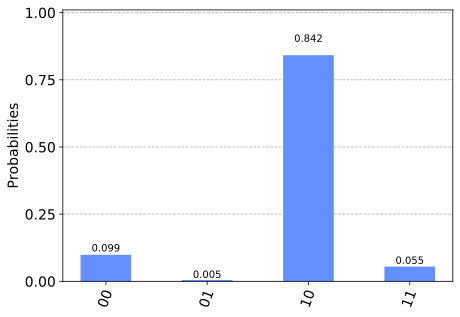

In [34]:
job = qpk.execute(qc, emulator, shots=1024, noise_model=noise_model,
                  coupling_map=coupling_map,
                  basis_gates=noise_model.basis_gates)

plot_histogram(job.result().get_counts())